In [1]:
import numpy as np
from collections import Counter

In [2]:
#Euclidian Distance
def euclidean_distance(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))

class k_nearest_neighbors:
    def __init__(self,k):
        self.k = k
        
    def knn_fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        
    def knn_predict(self, X):
        predicted_label=[self._predict(x) for x in X]
        
        return np.array(predicted_label)
    def _predict(self, x):
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_lables =[self.y_train[i] for i in k_indices]
        majority_vote = Counter(k_nearest_lables).most_common(1)
        return majority_vote[0][0]
        

In [3]:
from sklearn import datasets 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

iris_data = datasets.load_iris()
data = iris_data.data
target = iris_data.target

#train / test split data
X_train,X_test,y_train,y_test = train_test_split(data, target, test_size=0.2)
print("training instances: ",len(X_train))
print("Test instances: ",len(X_test))

#Train KNN model
my_model = k_nearest_neighbors(k = 3)
model = my_model.knn_fit(X_train,y_train)

predictions = my_model.knn_predict(X_test)

#Evalution report
print("Confusion Matrix")
print(confusion_matrix(y_test,predictions))
print("Classification report: ",classification_report(y_test, predictions,output_dict=True))
    

training instances:  120
Test instances:  30
Confusion Matrix
[[11  0  0]
 [ 0  6  2]
 [ 0  0 11]]
Classification report:  {'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 11}, '1': {'precision': 1.0, 'recall': 0.75, 'f1-score': 0.8571428571428571, 'support': 8}, '2': {'precision': 0.8461538461538461, 'recall': 1.0, 'f1-score': 0.9166666666666666, 'support': 11}, 'accuracy': 0.9333333333333333, 'macro avg': {'precision': 0.9487179487179488, 'recall': 0.9166666666666666, 'f1-score': 0.9246031746031745, 'support': 30}, 'weighted avg': {'precision': 0.9435897435897436, 'recall': 0.9333333333333333, 'f1-score': 0.9313492063492064, 'support': 30}}


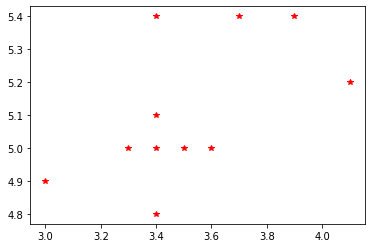

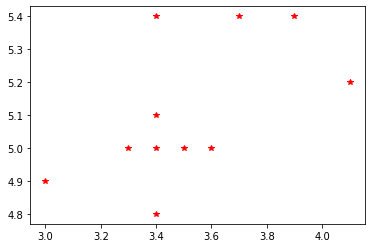

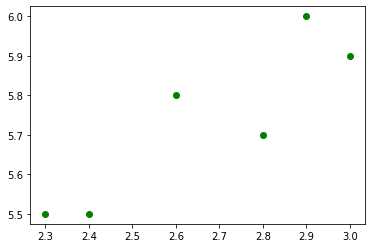

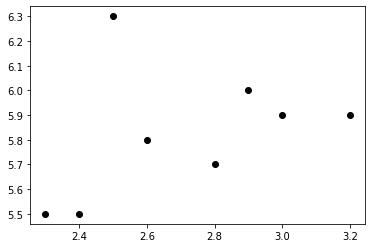

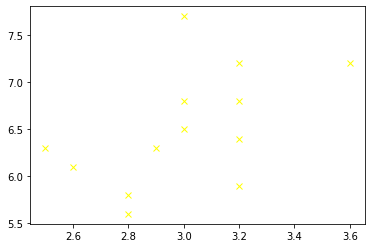

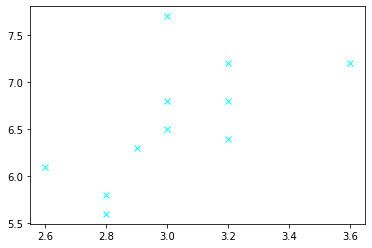

In [6]:
#Visualize the predictions
for class_value in range(3):
    row_ix = np.where(predictions == class_value)
    
    row_px = np.where(y_test == class_value)
    if(class_value==0):
        n='*'
        c='red'
    elif(class_value==1):
        n='o'
        c='green'
    elif(class_value==2):
        n='x'
        c='yellow'
        
    plot1 = plt.figure(1)
    plt.plot(X_test[row_ix, 1],X_test[row_ix,0],marker=n,color=c)
    
    if(class_value==0):
        n='*'
        color='violet'
    elif(class_value==1):
        n='o'
        c='black'
    elif(class_value==2):
        n='x'
        c='cyan'
        
    plot2=plt.figure(2)
    plt.plot(X_test[row_px, 1],X_test[row_px,0],marker=n,color=c)
    plt.show()
        